<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [131]:
!pip install wget

In [132]:
!python -m wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite


Saved under m4_survey_data (1).sqlite


Connect to the database.


In [133]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [135]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [136]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [137]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [138]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:ylabel='Frequency'>

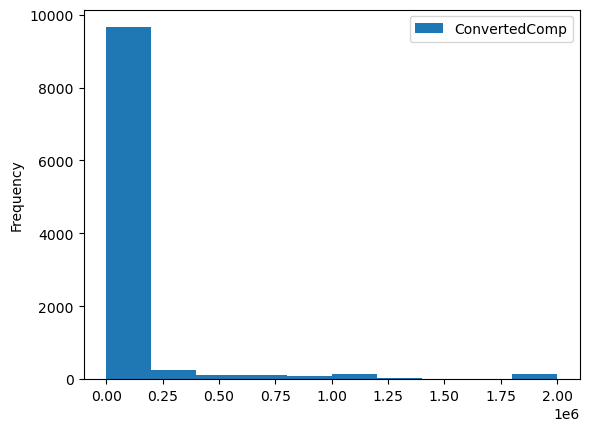

In [139]:
QUERY = """
SELECT ConvertedComp from master
"""
df = pd.read_sql_query(QUERY, conn)
df.plot(kind='hist')

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:title={'center':'BoxPlot of Programmer Ages'}>

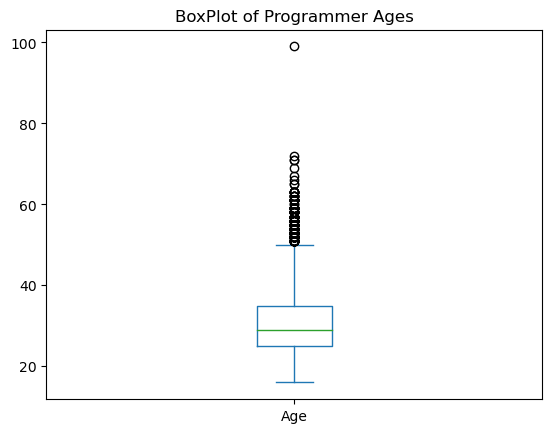

In [140]:
QUERY = """
SELECT Age from master
"""
df = pd.read_sql_query(QUERY, conn)
df.plot(kind='box', title='BoxPlot of Programmer Ages')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:title={'center':'ScatterPlot of Work Week Hours vs Age'}, xlabel='Age', ylabel='WorkWeekHrs'>

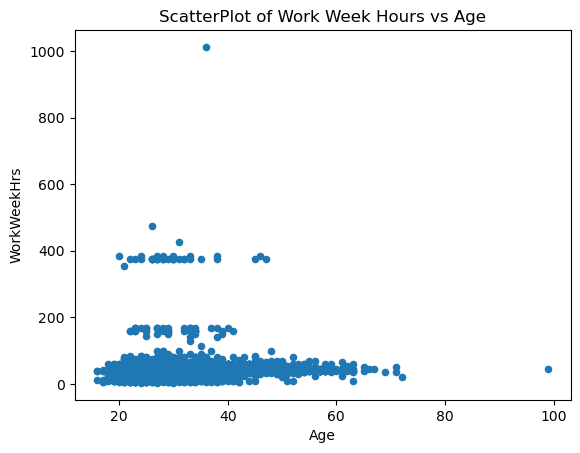

In [141]:
QUERY = """
SELECT Age,WorkWeekHrs from master
"""
df = pd.read_sql_query(QUERY, conn)
df.plot(kind='scatter', x='Age', y='WorkWeekHrs', title='ScatterPlot of Work Week Hours vs Age')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Text(0.5, 0, 'Work Week Hours')

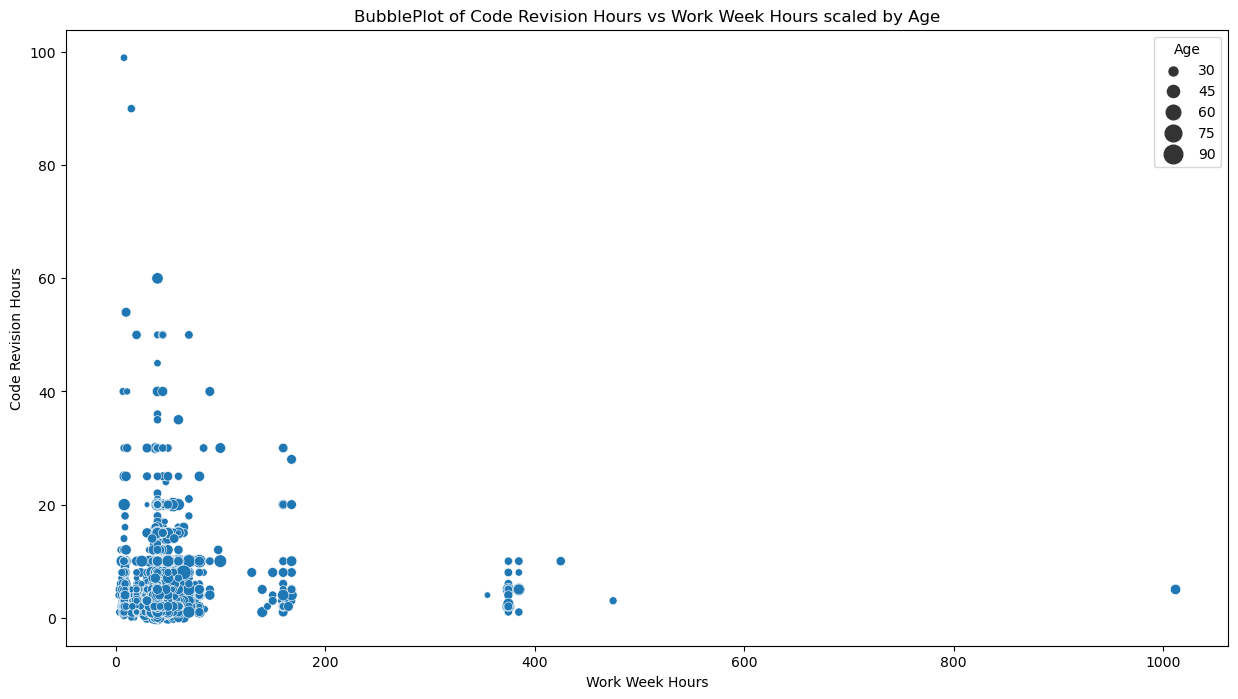

In [142]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs from master
"""
df = pd.read_sql_query(QUERY, conn)
#df = df[df.WorkWeekHrs < 600]
#df = df[df.CodeRevHrs < 80]
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', sizes=(10,200))
plt.title('BubblePlot of Code Revision Hours vs Work Week Hours scaled by Age')
plt.ylabel('Code Revision Hours')
plt.xlabel('Work Week Hours')


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


                        Lang   CNT
Lang                              
PostgreSQL        PostgreSQL  4328
MongoDB              MongoDB  3649
Redis                  Redis  3331
MySQL                  MySQL  3281
Elasticsearch  Elasticsearch  2856


<AxesSubplot:title={'center':'PieChart of DataBases Desired to Learn Next Year'}, ylabel='CNT'>

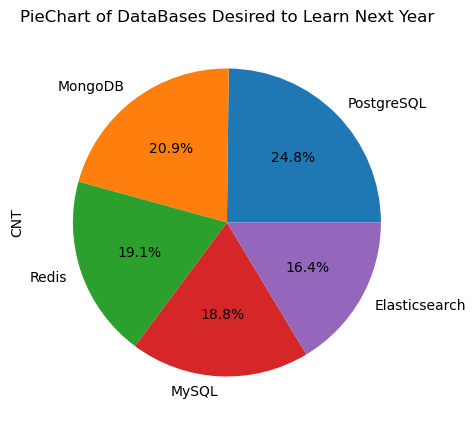

In [145]:
QUERY = """
SELECT DatabaseDesireNextYear as Lang, count(DatabaseDesireNextYear) as CNT from DatabaseDesireNextYear 
    GROUP BY Lang
    ORDER by CNT DESC
"""
df = pd.read_sql_query(QUERY, conn)
df.index = df.Lang
print(df.head())
df.head(5).plot(kind='pie', y='CNT', x='Lang', figsize=(12,5), legend=False, autopct='%1.1f%%',
                title='PieChart of DataBases Desired to Learn Next Year')

                  Lang   CNT
Lang                        
JavaScript  JavaScript  6630
HTML/CSS      HTML/CSS  5328
Python          Python  5239
SQL                SQL  5012
TypeScript  TypeScript  4088


<AxesSubplot:title={'center':'PieChart of Languages Desired to Learn Next Year'}, ylabel='CNT'>

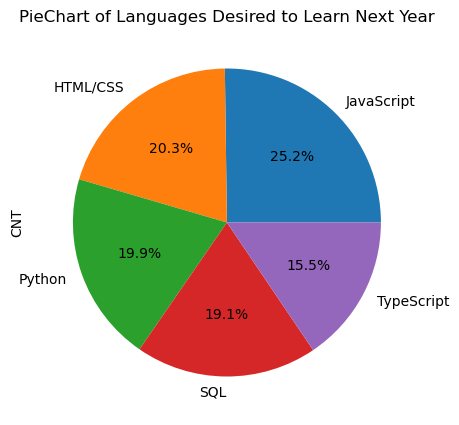

In [146]:
QUERY = """
SELECT LanguageDesireNextYear as Lang, count(LanguageDesireNextYear) as CNT from LanguageDesireNextYear 
    GROUP BY Lang
    ORDER by CNT DESC
"""
df = pd.read_sql_query(QUERY, conn)
df.index = df.Lang
print(df.head())
df.head(5).plot(kind='pie', y='CNT', x='Lang', figsize=(12,5), legend=False, autopct='%1.1f%%',
                title='PieChart of Languages Desired to Learn Next Year')

In [147]:
QUERY = """
SELECT LanguageWorkedWith as Lang, count(LanguageWorkedWith) as CNT from LanguageWorkedWith 
    GROUP BY Lang
    ORDER by CNT DESC
"""
df = pd.read_sql_query(QUERY, conn)
df

,Lang,CNT
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


In [158]:
QUERY = """
SELECT Respondent, DatabaseWorkedWith as DB, Count(Respondent) as CNT from DatabaseWorkedWith 
GROUP BY Respondent
HAVING count(Respondent)==1
"""
df = pd.read_sql_query(QUERY, conn)
len(df[df.DB=='MySQL'])

474

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

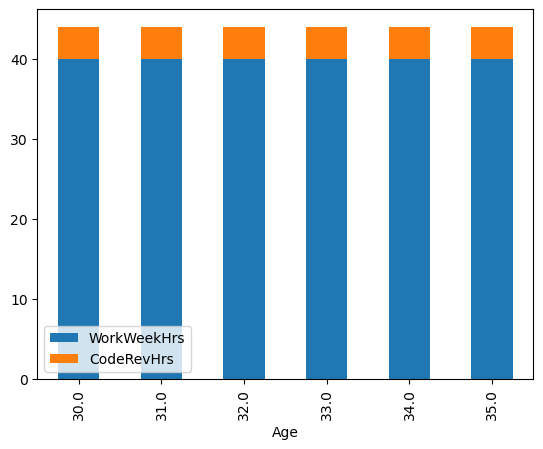

In [92]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age from master 
    WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY, conn)
df_grouped1 = df.groupby('Age').median().reset_index()
df_grouped1.plot(kind='bar', x='Age', stacked=True)


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


Text(0.5, 1.0, 'ScatterPlot of Annual Compensation vs Age')

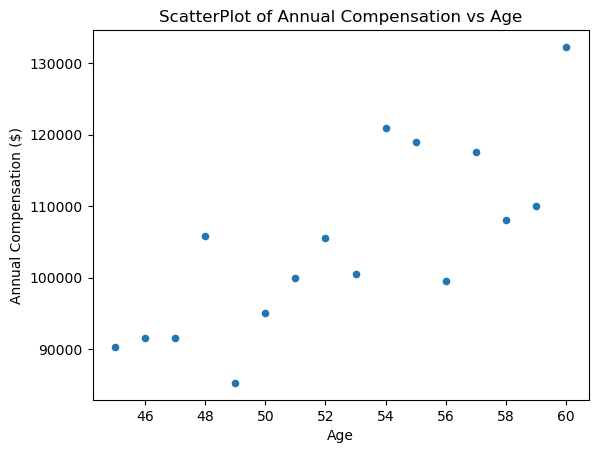

In [94]:
QUERY = """
SELECT ConvertedComp, Age from master 
    WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY, conn)
df_grouped1 = df.groupby('Age').median().reset_index()
df_grouped1.plot(kind='scatter', x='Age', y='ConvertedComp')
plt.ylabel('Annual Compensation ($)')
plt.xlabel('Age')
plt.title('ScatterPlot of Annual Compensation vs Age')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


                                                                                           MainBranch  \
MainBranch                                                                                              
I am a developer by profession                                         I am a developer by profession   
I am not primarily a developer, but I\nwrite co...  I am not primarily a developer, but I write co...   

                                                      CNT  
MainBranch                                                 
I am a developer by profession                      10618  
I am not primarily a developer, but I\nwrite co...    780  


Text(0, 0.5, '')

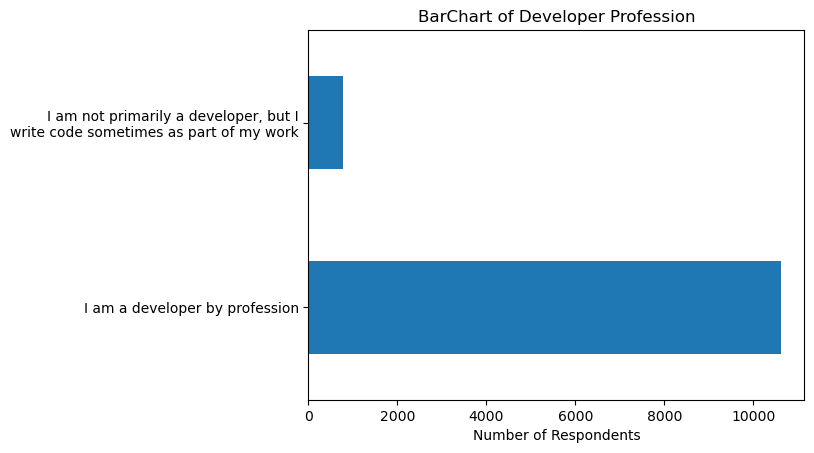

In [128]:
def add_break(sentence):
    parts = sentence.split(' ')
    half = len(parts)//2
    first_half = ' '.join(parts[:half])
    second_half = ' '.join(parts[half:])
    return first_half + '\n' + second_half

QUERY = """
SELECT MainBranch, COUNT(MainBranch) as CNT from master
    GROUP BY MainBranch
    ORDER BY CNT DESC
"""
df = pd.read_sql_query(QUERY, conn)
df.index = df.MainBranch

old_index = df.index[1]
new_index = add_break(old_index)

df.rename(index={old_index : new_index}, inplace=True)
print(df.head())

df.plot(kind='barh', legend=False)
plt.title('BarChart of Developer Profession')
plt.xlabel('Number of Respondents')
plt.ylabel(None)

In [166]:
# DevType, PlatformWorkedWith, JobFactors from master
QUERY = """
SELECT * from DevType
"""
df = pd.read_sql_query(QUERY, conn)
df['DevType'].value_counts().sort_values(ascending=False)

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

Close the database connection.


In [129]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
